In [1]:
import requests

# List of image URLs and corresponding filenames
image_urls = [
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png", "lenna.png"),
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png", "baboon.png"),
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp", "goldhill.bmp"),
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg", "cameraman.jpeg"),
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png", "zelda.png"),
    ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png", "mammogram.png")
]

# Download each image
for url, filename in image_urls:
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {filename}")


Downloaded lenna.png
Downloaded baboon.png
Downloaded goldhill.bmp
Downloaded cameraman.jpeg
Downloaded zelda.png
Downloaded mammogram.png


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [3]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

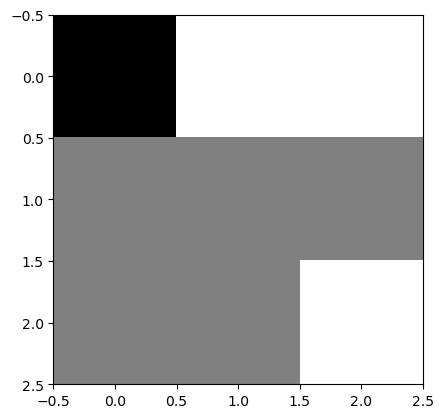

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [9]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

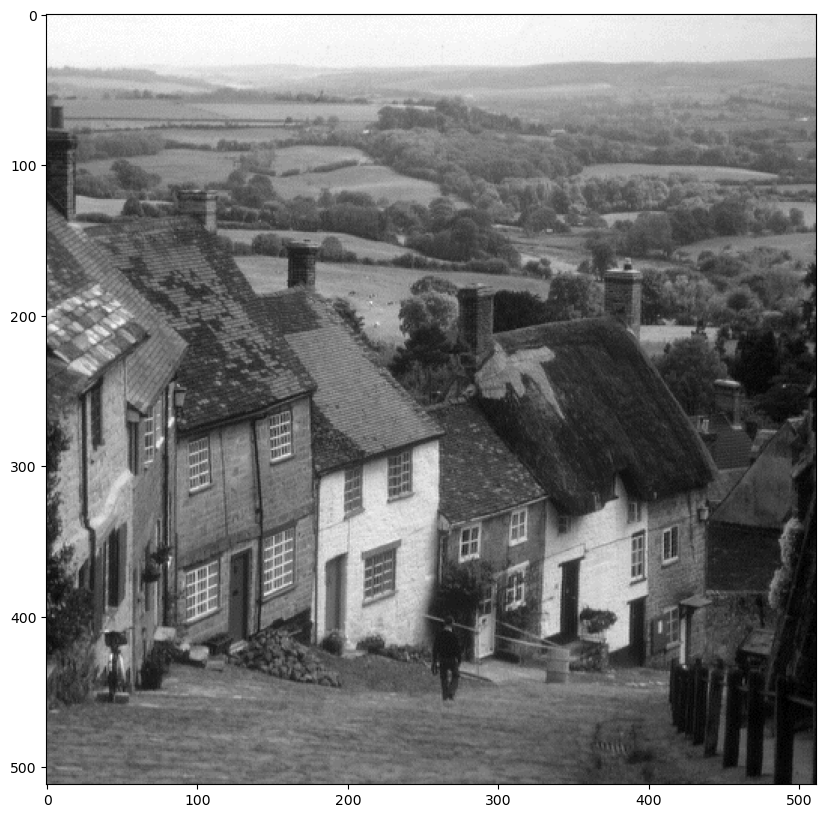

In [15]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [16]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

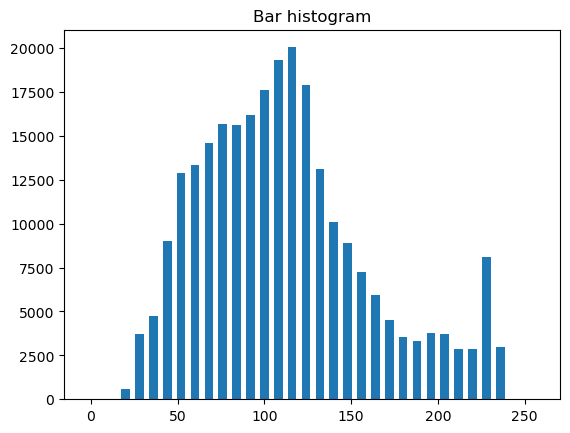

In [18]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [17]:
hist[:,0]

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,   564.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  3696.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  4730.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  8990.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 12883.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 13356.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 14592.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 15688.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 15632.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 16169.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 17621.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 19310.,     0.,     0.,     0.,
      

In [19]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

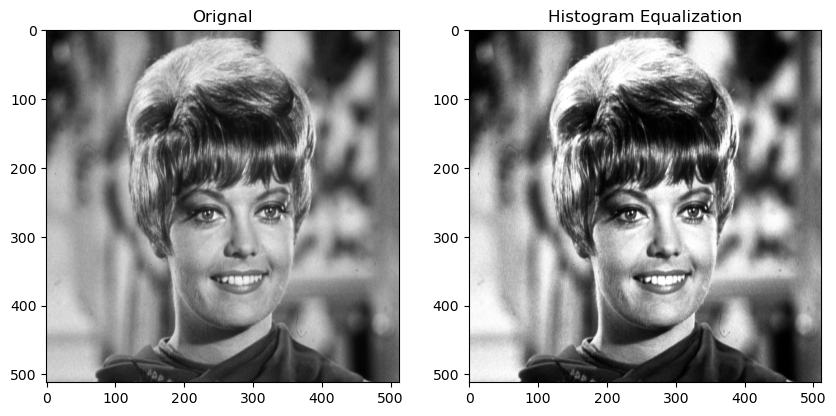

In [20]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

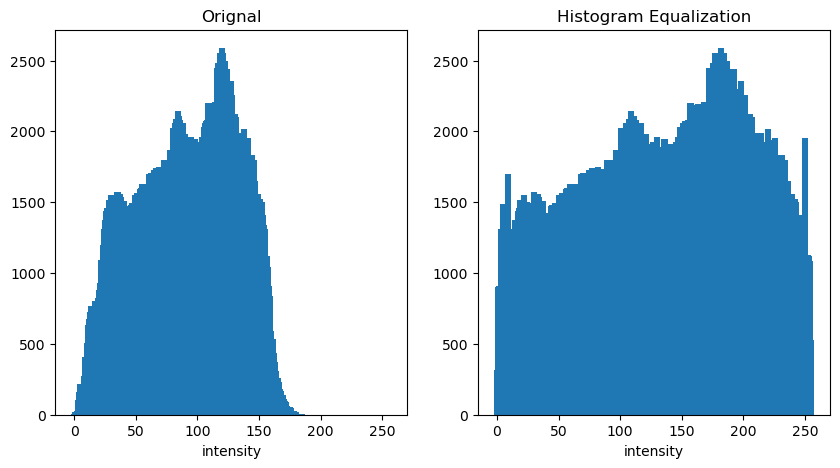

In [21]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

In [22]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

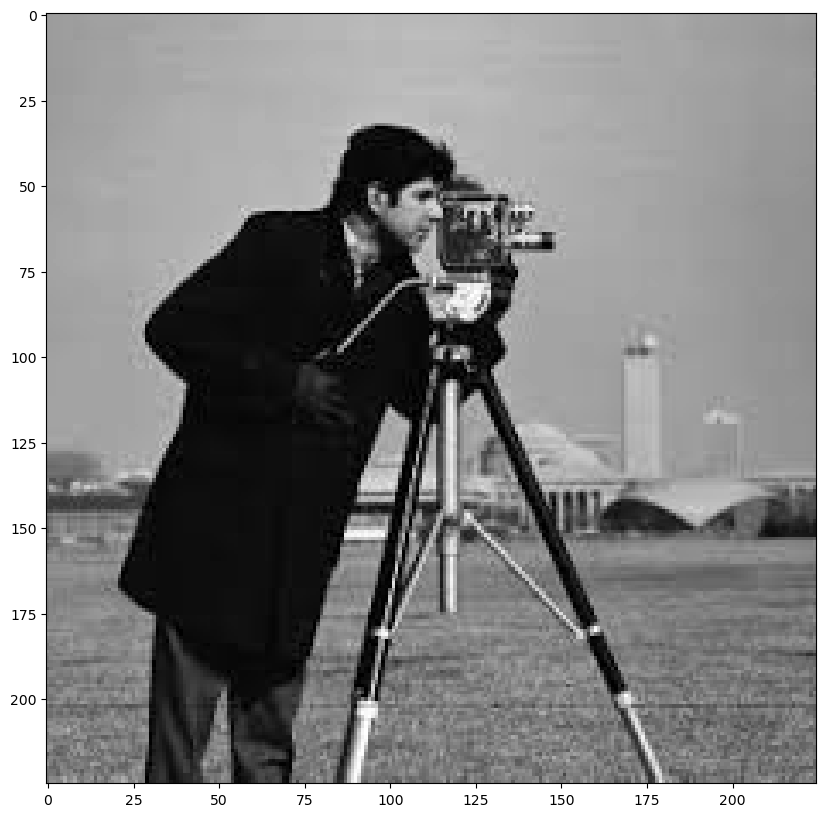

In [23]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

In [24]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

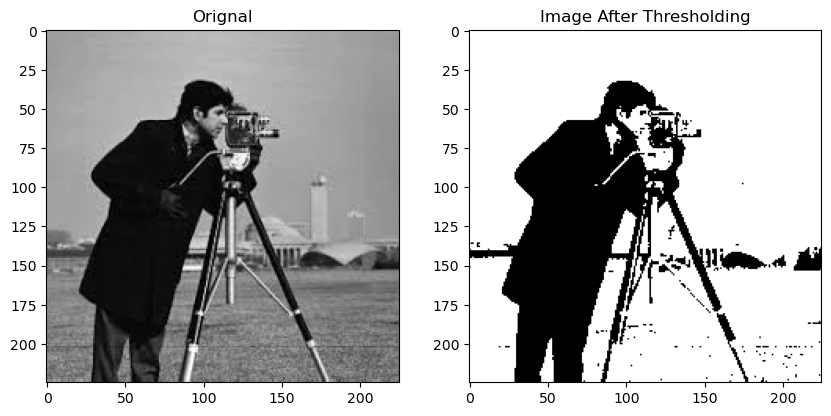

In [25]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

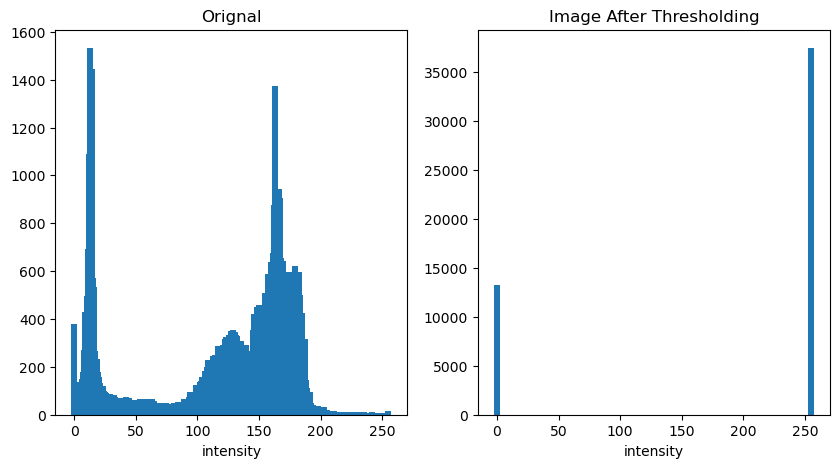

In [26]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

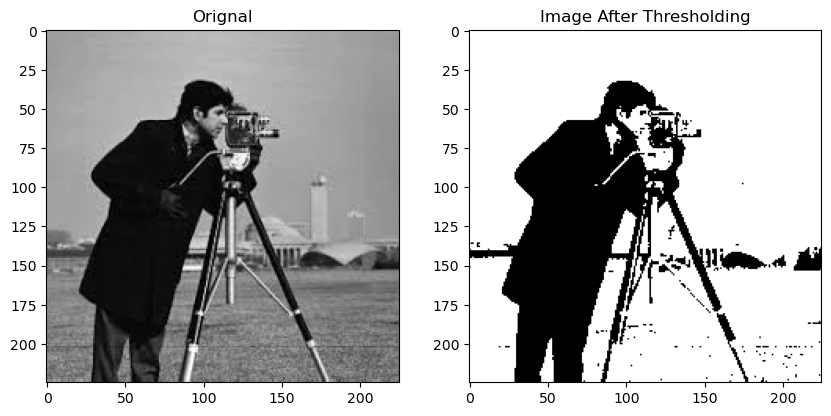

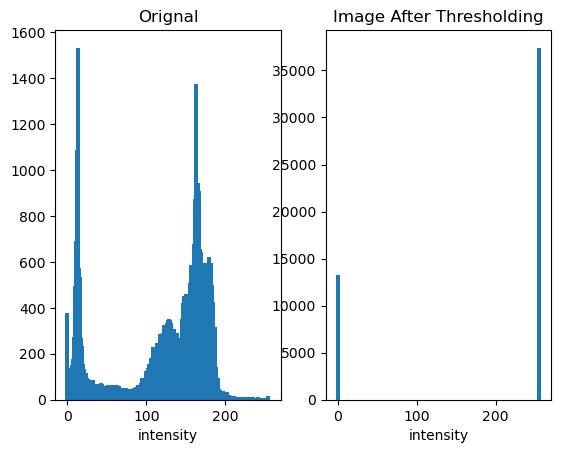

In [27]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

<code>ret</code> is the threshold value and <code>new_image</code> is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:

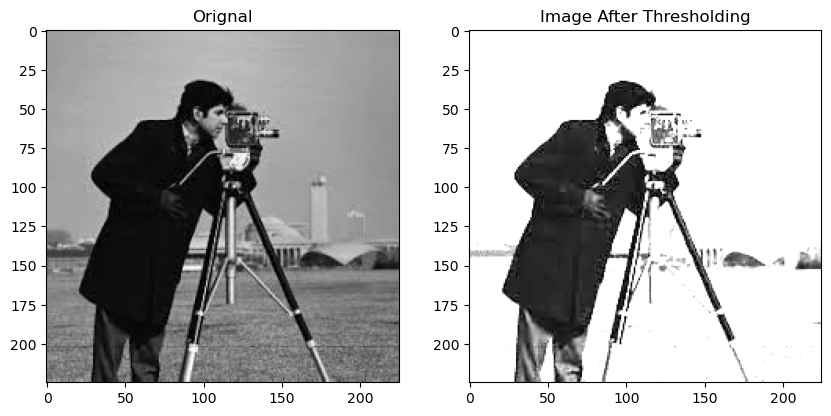

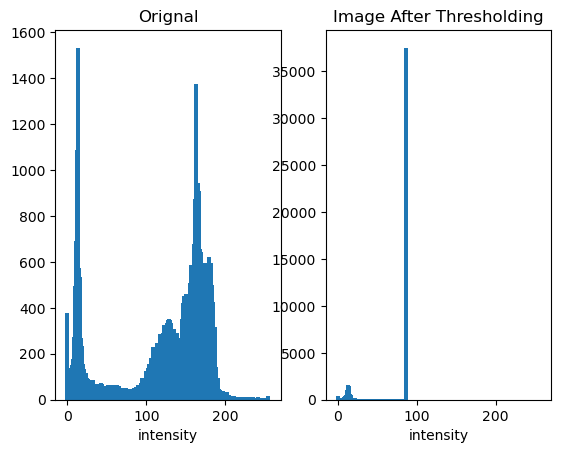

In [28]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

 Otsu's method <code>cv2.THRESH_OTSU</code> avoids having to choose a value and determines it automatically, using the histogram.


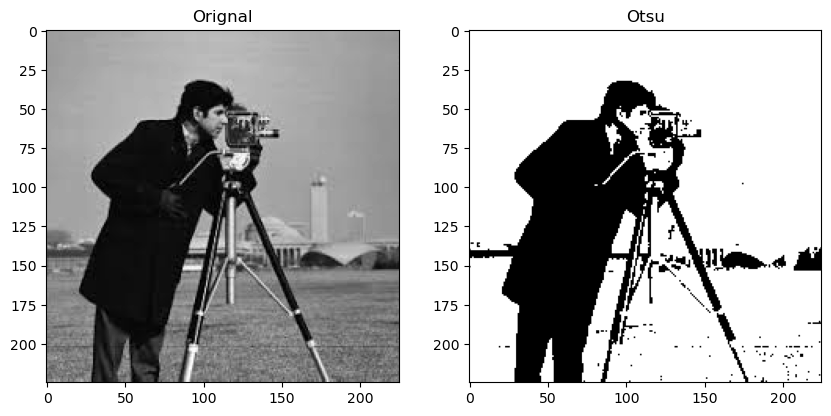

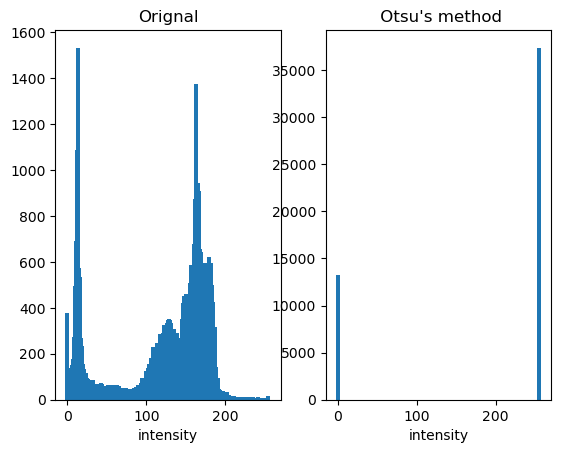

In [29]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")